1. Importar Librerías

In [68]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#plt.style.use("seaborn-v0_8-darkgrid")

2. Abrir archivo ROOT y leer árbol

In [69]:
file = uproot.open("NeutronData_10000000.root")
tree = file["NeutronTracks"]

print(tree.keys())

['EventID', 'TrackID', 'ParentID', 'KineticEnergy_eV', 'FinalTime_ns', 'FinalPosX_mm', 'FinalPosY_mm', 'FinalPosZ_mm', 'TotalTrackLength_mm', 'NumSteps', 'FinalVolume', 'FinalProcess', 'DirX', 'DirY', 'DirZ']


3. Cargar datos a un DataFrame

In [70]:
data = tree.arrays(library="pd")
data.head()

,EventID,TrackID,ParentID,KineticEnergy_eV,FinalTime_ns,FinalPosX_mm,FinalPosY_mm,FinalPosZ_mm,TotalTrackLength_mm,NumSteps,FinalVolume,FinalProcess,DirX,DirY,DirZ
0,7,1,0,4.200000e+06,3.256441,0.000000,0.000000,46.0,93.000000,4,Detector,Transportation,0.000000,0.000000,1.00000
1,14,1,0,4.200000e+06,3.256441,0.000000,0.000000,46.0,93.000000,4,Detector,Transportation,0.000000,0.000000,1.00000
2,21,1,0,4.200000e+06,3.256441,0.000000,0.000000,46.0,93.000000,4,Detector,Transportation,0.000000,0.000000,1.00000
3,26,1,0,4.125769e+06,3.270080,-0.954878,1.161883,46.0,93.473778,5,Detector,Transportation,-0.284249,0.345871,0.89419
4,32,1,0,4.200000e+06,3.256441,0.000000,0.000000,46.0,93.000000,4,Detector,Transportation,0.000000,0.000000,1.00000


4. Descripción básica

In [71]:
print("Eventos:", len(data))
data.describe()

Eventos: 1913615


,EventID,TrackID,ParentID,KineticEnergy_eV,FinalTime_ns,FinalPosX_mm,FinalPosY_mm,FinalPosZ_mm,TotalTrackLength_mm,NumSteps,DirX,DirY,DirZ
count,1.913615e+06,1.913615e+06,1.913615e+06,1.913615e+06,1.913615e+06,1.913615e+06,1.913615e+06,1.913615e+06,1.913615e+06,1.913615e+06,1.913615e+06,1.913615e+06,1.913615e+06
mean,4.998492e+06,1.000002e+00,1.045142e-06,3.711573e+06,1.326146e+03,1.342803e-03,1.616543e-03,4.600173e+01,9.825799e+01,5.362979e+00,8.149273e-05,-1.593383e-04,9.468921e-01
std,2.887726e+06,2.044644e-03,1.022322e-03,1.111915e+06,1.475840e+04,2.826620e+00,2.826325e+00,3.422601e-02,3.694334e+01,7.221318e+00,2.089770e-01,2.086332e-01,1.272644e-01
min,7.000000e+00,1.000000e+00,0.000000e+00,1.682565e-05,3.256441e+00,-1.000000e+01,-1.000000e+01,4.600000e+01,4.074735e+01,3.000000e+00,-9.986502e-01,-9.995878e-01,-9.998723e-01
25%,2.498946e+06,1.000000e+00,0.000000e+00,4.084965e+06,3.256441e+00,0.000000e+00,0.000000e+00,4.600000e+01,9.300000e+01,4.000000e+00,0.000000e+00,0.000000e+00,9.748085e-01
50%,4.998536e+06,1.000000e+00,0.000000e+00,4.200000e+06,3.256441e+00,0.000000e+00,0.000000e+00,4.600000e+01,9.300000e+01,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,7.498250e+06,1.000000e+00,0.000000e+00,4.200000e+06,3.291205e+00,0.000000e+00,0.000000e+00,4.600000e+01,9.364270e+01,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,9.999999e+06,3.000000e+00,1.000000e+00,4.200000e+06,1.103048e+06,1.000000e+01,1.000000e+01,4.700000e+01,2.323002e+03,3.910000e+02,9.997739e-01,9.974453e-01,1.000000e+00


5. Histograma log-log de energías finales

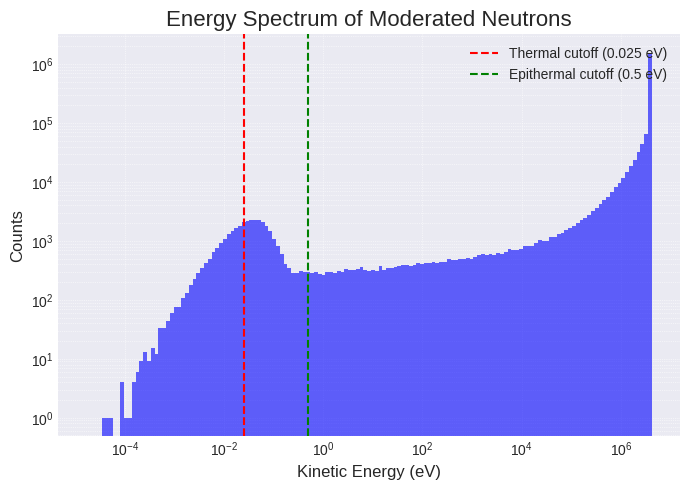

In [72]:
E_TERMICO_MAX_EV = 0.025
E_EPITERMICO_MAX_EV = 0.5


# --- ENERGY SPECTRUM (Log-Log) ---
ener = data["KineticEnergy_eV"]

plt.figure(figsize=(7, 5))

# Filtrar energías > 0 para evitar problemas con log(0)
energias_positivas = ener[ener > 0]

if not energias_positivas.empty:

    # Determinar límites logarítmicos
    e_min = max(1e-5, energias_positivas.min())
    e_max = energias_positivas.max()

    if e_min < e_max:
        bins_log = np.logspace(np.log10(e_min), np.log10(e_max), 150)
    else:
        bins_log = np.array([e_min, e_max])

    # Histograma
    plt.hist(energias_positivas, bins=bins_log, color='blue', alpha=0.6)

# --- Líneas de corte ---
plt.axvline(E_TERMICO_MAX_EV, color='red', linestyle='--',
            label=f'Thermal cutoff ({E_TERMICO_MAX_EV} eV)')

plt.axvline(E_EPITERMICO_MAX_EV, color='green', linestyle='--',
            label=f'Epithermal cutoff ({E_EPITERMICO_MAX_EV} eV)')

# Escalas log-log
plt.xscale('log')
plt.yscale('log')

plt.title('Energy Spectrum of Moderated Neutrons', fontsize=16)
plt.xlabel('Kinetic Energy (eV)', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend()

plt.grid(True, which='both', linestyle=':', linewidth=0.5)

plt.tight_layout()

nombre_fig = "Energy_Spectrum.png"

plt.show()


6. Clasificación de energías (térmicos, epitérmicos, rápidos)

In [77]:
# Clasificación por energía
thermal = np.sum(ener < 0.025)
epithermal = np.sum((ener >= 0.025) & (ener < 0.5))
fast = np.sum(ener >= 0.5)

# Total detectados en el archivo
detected = len(ener)

# Total simulados en Geant4
simulated = 10000000

print("=== Conteo de neutrones detectados ===")
print(f"Térmicos (<0.025 eV): {thermal}")
print(f"Epitérmicos (0.025–0.5 eV): {epithermal}")
print(f"Rápidos (>0.5 eV): {fast}")
print(f"Total detectados: {detected} de {simulated}")

# Porcentajes respecto a detectados
print("\n=== Porcentajes respecto a detectados ===")
print(f"Térmicos: {thermal/detected*100:.2f}%")
print(f"Epitérmicos: {epithermal/detected*100:.2f}%")
print(f"Rápidos: {fast/detected*100:.2f}%")

# Porcentajes respecto al total simulado
print("\n=== Porcentajes respecto a los 10000 neutrones simulados ===")
print(f"Térmicos: {thermal/simulated*100:.3f}%")
print(f"Epitérmicos: {epithermal/simulated*100:.3f}%")
print(f"Rápidos: {fast/simulated*100:.3f}%")

# Eficiencia total de transporte a la región donde mides
print("\n=== Eficiencia total de neutrones que alcanzaron el detector ===")
print(f"Eficiencia = {detected/simulated*100:.3f}%")


=== Conteo de neutrones detectados ===
Térmicos (<0.025 eV): 13214
Epitérmicos (0.025–0.5 eV): 20022
Rápidos (>0.5 eV): 1880379
Total detectados: 1913615 de 10000000

=== Porcentajes respecto a detectados ===
Térmicos: 0.69%
Epitérmicos: 1.05%
Rápidos: 98.26%

=== Porcentajes respecto a los 10000 neutrones simulados ===
Térmicos: 0.132%
Epitérmicos: 0.200%
Rápidos: 18.804%

=== Eficiencia total de neutrones que alcanzaron el detector ===
Eficiencia = 19.136%


8. Procesos que detuvieron al neutrón

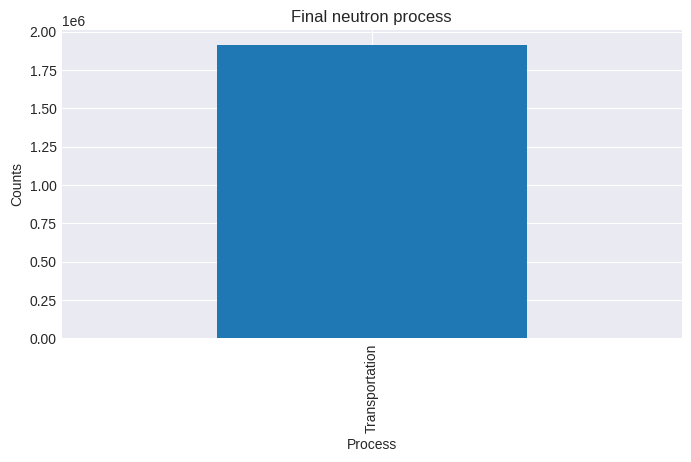

In [74]:
procs = np.array(data["FinalProcess"].to_list())
procs_count = pd.Series(procs).value_counts()

procs_count.plot(kind="bar", figsize=(8,4))
plt.title("Final neutron process")
plt.xlabel("Process")
plt.ylabel("Counts")
plt.show()

Steps vs Energía (scatter)

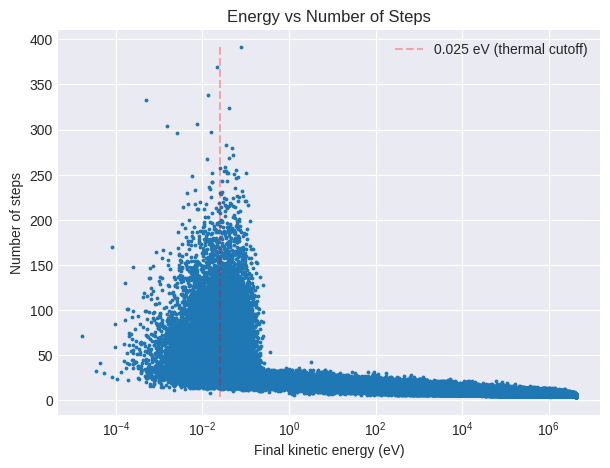

In [75]:
plt.figure(figsize=(7,5))
plt.scatter(data["KineticEnergy_eV"], data["NumSteps"],
            s=3)

plt.vlines(0.025, ymin=data["NumSteps"].min(), ymax=data["NumSteps"].max(),
           colors="red", linestyles="dashed", label="0.025 eV (thermal cutoff)",alpha=0.3)

plt.xscale("log")
plt.xlabel("Final kinetic energy (eV)")
plt.ylabel("Number of steps")
plt.title("Energy vs Number of Steps")
plt.legend()
plt.show()



Histograma Steps

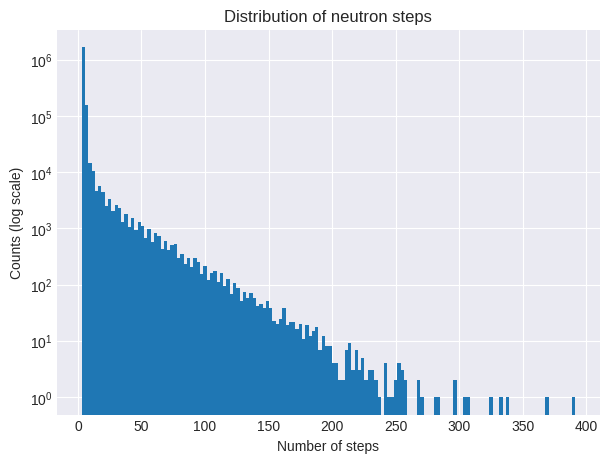

In [76]:
plt.figure(figsize=(7,5))
plt.hist(data["NumSteps"], bins=150, log=True)
plt.xlabel("Number of steps")
plt.ylabel("Counts (log scale)")
plt.title("Distribution of neutron steps")
plt.show()
